In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from time import time

In [2]:
def gaussian_elimination(A, B, type_):
    A = np.array(A, type_)
    B = np.array(B, type_)
    n = len(A)
    X = np.zeros(n, type_)
    
    # Elimination
    for k in range(n - 1):
        for i in range(k+1, n):
            if A[i,k] == 0: continue
            factor = A[k,k] / A[i,k]
            # you can substitute line 16 and 17 with below lines, it will be faster
            A[i] *= factor
            A[i] -= A[k]
#             for j in range(k, n):
#                 A[i, j] = A[i, j] * factor - A[k ,j]
            B[i] = B[i] * factor - B[k]
    
    # Back-substitution
    X[n-1] = B[n-1] / A[n-1, n-1]
    for i in range(n-2, -1, -1):
        sum_ax = sum([A[i, j] * X[j] for j in range(i+1, n)])
        X[i] = (B[i] - sum_ax) / A[i, i]
        
    return X  
            

In [3]:
def thomas_algorithm(A, B, type_):
    A = np.array(A, type_)
    B = np.array(B, type_)
    n = len(A)
    X = np.zeros(n, type_)
    
    # Coefficients
    for i in range(1, n):
        w = A[i, i-1] / A[i-1, i-1]
        A[i, i] -= w * A[i-1, i] 
        B[i] -= w * B[i-1]
        
    # Back-substitution
    X[n-1] = B[n-1] / A[n-1, n-1]
    for i in range(n-2, -1, -1):
        X[i] = (B[i] - A[i, i+1] * X[i+1]) / A[i, i]

    return X

In [4]:
def hilbert_matrix(n):
    return np.array(
        [ [1 if i==1 else 1 / (i + j - 1) for j in range(1, n+1)] for i in range(1, n+1) ]
    )

In [5]:
def second_matrix(n):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = 2*(i+1)/(j+1) if j >= i else A[j, i]
    return A

In [6]:
k, m = 5, 2

def my_matrix(n):
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = k
        if i < n-1:
            A[i, i+1] = 1/(i + 1 + m)
        if i > 0:
            A[i, i-1] = 1/(i + 2 + m)
    return A


In [7]:
vector_x = [1, -1, 1, -1]

In [8]:
def get_start_vector(n):
    return np.array([1 if i%2 == 0 else -1 for i in range(n)])

In [9]:
def get_df(results):
    df = pd.DataFrame(results)
    df.columns = df.iloc[0]
    df = df[1:]
    df.set_index('n', inplace=True)
    return df

In [10]:
def plot(df, title=None, scale="linear"):
    plt.rcParams['figure.figsize'] = [9, 6]

    plt.yscale(scale)
    plt.plot(df, label="")

    if title:
        plt.title(title, y=-0.12)

    plt.legend(df.columns ,bbox_to_anchor=(0.85, 0.23), loc='upper left', borderaxespad=0)
    plt.grid()
    plt.show()

## zadanie 1

In [11]:
results = [['n', 'float64']]

for n in range(3, 20):
    temp = [n]
    for type_ in [np.float64]:
        X = get_start_vector(n)
        A = hilbert_matrix(n)
        B = A @ X
        result = gaussian_elimination(A, B, type_)
        temp.append(result)
    results.append(temp)

df = get_df(results)

In [12]:
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒═════╤═══════════════════════════════════════════════════════════════════════════╕
│   n │ float64                                                                   │
╞═════╪═══════════════════════════════════════════════════════════════════════════╡
│   3 │ [ 1. -1.  1.]                                                             │
├─────┼───────────────────────────────────────────────────────────────────────────┤
│   4 │ [ 1. -1.  1. -1.]                                                         │
├─────┼───────────────────────────────────────────────────────────────────────────┤
│   5 │ [ 1. -1.  1. -1.  1.]                                                     │
├─────┼───────────────────────────────────────────────────────────────────────────┤
│   6 │ [ 1. -1.  1. -1.  1. -1.]                                                 │
├─────┼───────────────────────────────────────────────────────────────────────────┤
│   7 │ [ 1. -1.  1. -1.  1. -1.  1.]                                       

In [13]:
results = [['n', 'float32', 'float64', 'float128']]

for n in range(3, 101):
    temp = [n]
    for type_ in [np.float32, np.float64, np.float128]:
        X = get_start_vector(n)
        A = hilbert_matrix(n)
        B = A @ X
        result = gaussian_elimination(A, B, type_)
        temp.append(np.linalg.norm(X - result))
    results.append(temp)

df = get_df(results)

In [14]:
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒═════╤═══════════════╤═════════════════╤═════════════════╕
│   n │       float32 │         float64 │        float128 │
╞═════╪═══════════════╪═════════════════╪═════════════════╡
│   3 │   1.78416e-06 │     4.45198e-15 │     8.11343e-19 │
├─────┼───────────────┼─────────────────┼─────────────────┤
│   4 │   0.000107483 │     2.00077e-13 │     3.7446e-17  │
├─────┼───────────────┼─────────────────┼─────────────────┤
│   5 │   0.00186008  │     1.18193e-12 │     3.22026e-12 │
├─────┼───────────────┼─────────────────┼─────────────────┤
│   6 │   0.0470875   │     1.11254e-10 │     8.39538e-11 │
├─────┼───────────────┼─────────────────┼─────────────────┤
│   7 │  33.0965      │     3.57715e-09 │     1.21164e-09 │
├─────┼───────────────┼─────────────────┼─────────────────┤
│   8 │   6.392       │     1.97104e-07 │     1.04655e-07 │
├─────┼───────────────┼─────────────────┼─────────────────┤
│   9 │  41.3005      │     1.13246e-05 │     7.54774e-06 │
├─────┼───────────────┼─────────────────

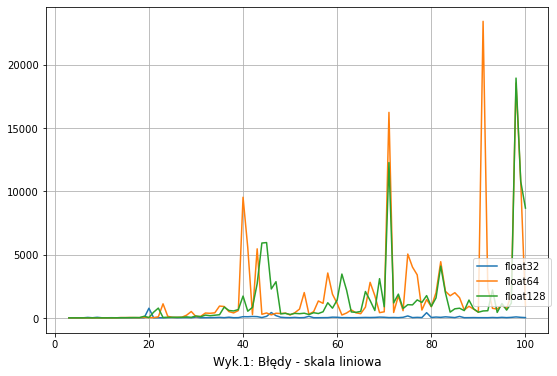

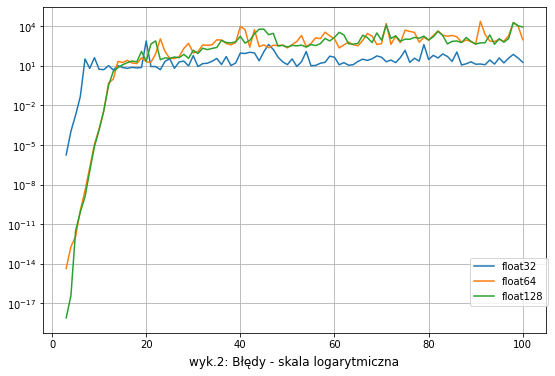

In [15]:
plot(df, title="Wyk.1: Błędy - skala liniowa")
print()
plot(df, title="wyk.2: Błędy - skala logarytmiczna", scale="log")

## zadanie 2

In [16]:
results = [['n', 'float64']]

for n in range(3, 20):
    temp = [n]
    for type_ in [np.float64]:
        X = get_start_vector(n)
        A = second_matrix(n)
        B = A @ X
        result = gaussian_elimination(A, B, type_)
        temp.append(result)
    results.append(temp)

df = get_df(results)

In [17]:
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒═════╤═══════════════════════════════════════════════════════════════════════════╕
│   n │ float64                                                                   │
╞═════╪═══════════════════════════════════════════════════════════════════════════╡
│   3 │ [ 1. -1.  1.]                                                             │
├─────┼───────────────────────────────────────────────────────────────────────────┤
│   4 │ [ 1. -1.  1. -1.]                                                         │
├─────┼───────────────────────────────────────────────────────────────────────────┤
│   5 │ [ 1. -1.  1. -1.  1.]                                                     │
├─────┼───────────────────────────────────────────────────────────────────────────┤
│   6 │ [ 1. -1.  1. -1.  1. -1.]                                                 │
├─────┼───────────────────────────────────────────────────────────────────────────┤
│   7 │ [ 1. -1.  1. -1.  1. -1.  1.]                                       

In [18]:
tested_values = [_ for _ in range(3, 101, 2)]
tested_values.extend([_ for _ in range(125, 601, 25)])

In [19]:
results = [['n', 'float32', 'float64', 'float128']]


for n in tested_values:
    temp = [n]
    for type_ in [np.float32, np.float64, np.float128]:
        X = get_start_vector(n)
        A = second_matrix(n)
        B = A @ X
        result = gaussian_elimination(A, B, type_)
        temp.append(np.linalg.norm(X - result))
    results.append(temp)

df = get_df(results)

In [20]:
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒═════╤═════════════╤═════════════╤═════════════╕
│   n │     float32 │     float64 │    float128 │
╞═════╪═════════════╪═════════════╪═════════════╡
│   3 │ 0           │ 3.14018e-16 │ 1.27876e-16 │
├─────┼─────────────┼─────────────┼─────────────┤
│   5 │ 1.57699e-07 │ 1.02358e-15 │ 5.94947e-16 │
├─────┼─────────────┼─────────────┼─────────────┤
│   7 │ 8.08517e-07 │ 2.20093e-15 │ 1.02303e-15 │
├─────┼─────────────┼─────────────┼─────────────┤
│   9 │ 1.18462e-06 │ 3.49147e-15 │ 2.62785e-15 │
├─────┼─────────────┼─────────────┼─────────────┤
│  11 │ 2.31846e-06 │ 4.93019e-15 │ 5.6433e-15  │
├─────┼─────────────┼─────────────┼─────────────┤
│  13 │ 2.17863e-06 │ 1.12566e-14 │ 1.3927e-14  │
├─────┼─────────────┼─────────────┼─────────────┤
│  15 │ 5.07515e-06 │ 1.82563e-14 │ 1.84992e-14 │
├─────┼─────────────┼─────────────┼─────────────┤
│  17 │ 5.1712e-06  │ 2.67587e-14 │ 2.28737e-14 │
├─────┼─────────────┼─────────────┼─────────────┤
│  19 │ 6.65173e-06 │ 2.33572e-14 │ 2.20551e-14 │


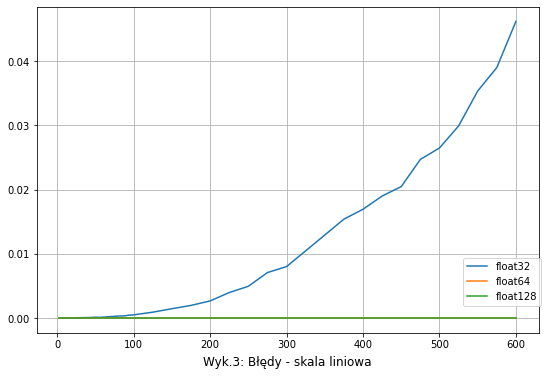

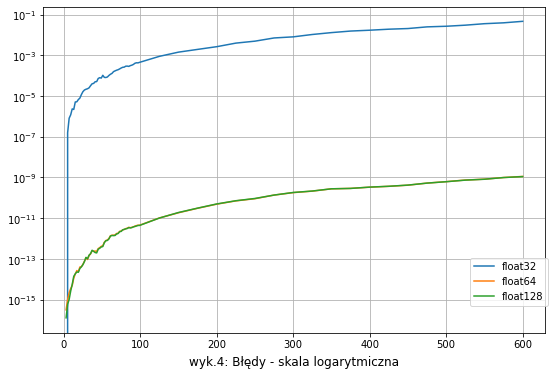

In [21]:
plot(df, title="Wyk.3: Błędy - skala liniowa")
print()
plot(df, title="wyk.4: Błędy - skala logarytmiczna", scale="log")

## zadanie 3

In [22]:
results = [['n', 'Gauss', 'Thomas']]

for n in tested_values:
    temp = [n]
    for method in [gaussian_elimination, thomas_algorithm]:
        X = get_start_vector(n)
        A = my_matrix(n)
        B = A @ X
        result = method(A, B, np.float64)
        temp.append(str(result))
    results.append(temp)

df = get_df(results)

/tmp/ipykernel_48099/1783308154.py:11: RuntimeWarning: overflow encountered in double_scalars
  factor = A[k,k] / A[i,k]
/tmp/ipykernel_48099/1783308154.py:13: RuntimeWarning: invalid value encountered in multiply
  A[i] *= factor
/tmp/ipykernel_48099/1783308154.py:14: RuntimeWarning: invalid value encountered in subtract
  A[i] -= A[k]


In [23]:
# print(tabulate(df, headers='keys', tablefmt=''))
df.head(20)

,Gauss,Thomas
n,,
3,[ 1. -1. 1.],[ 1. -1. 1.]
5,[ 1. -1. 1. -1. 1.],[ 1. -1. 1. -1. 1.]
7,[ 1. -1. 1. -1. 1. -1. 1.],[ 1. -1. 1. -1. 1. -1. 1.]
9,[ 1. -1. 1. -1. 1. -1. 1. -1. 1.],[ 1. -1. 1. -1. 1. -1. 1. -1. 1.]
11,[ 1. -1. 1. -1. 1. -1. 1. -1. 1. -1. 1.],[ 1. -1. 1. -1. 1. -1. 1. -1. 1. -1. 1.]
13,[ 1. -1. 1. -1. 1. -1. 1. -1. 1. -1. 1. -...,[ 1. -1. 1. -1. 1. -1. 1. -1. 1. -1. 1. -...
15,[ 1. -1. 1. -1. 1. -1. 1. -1. 1. -1. 1. -...,[ 1. -1. 1. -1. 1. -1. 1. -1. 1. -1. 1. -...
17,[ 1. -1. 1. -1. 1. -1. 1. -1. 1. -1. 1. -...,[ 1. -1. 1. -1. 1. -1. 1. -1. 1. -1. 1. -...
19,[ 1. -1. 1. -1. 1. -1. 1. -1. 1. -1. 1. -...,[ 1. -1. 1. -1. 1. -1. 1. -1. 1. -1. 1. -...


In [24]:
results = [['n', 'Gauss', 'Thomas']]

for n in tested_values:
    temp = [n]
    for method in [gaussian_elimination, thomas_algorithm]:
        X = get_start_vector(n)
        A = my_matrix(n)
        B = A @ X
        result = method(A, B, np.float64)
        temp.append(np.linalg.norm(result - X))
    results.append(temp)

df = get_df(results)

/tmp/ipykernel_48099/1783308154.py:11: RuntimeWarning: overflow encountered in double_scalars
  factor = A[k,k] / A[i,k]
/tmp/ipykernel_48099/1783308154.py:13: RuntimeWarning: invalid value encountered in multiply
  A[i] *= factor
/tmp/ipykernel_48099/1783308154.py:14: RuntimeWarning: invalid value encountered in subtract
  A[i] -= A[k]


In [25]:
print(tabulate(df, headers='keys', tablefmt=''))

  n          Gauss       Thomas
---  -------------  -----------
  3    1.11022e-16  0
  5    3.33067e-16  0
  7    3.33067e-16  0
  9    4.15407e-16  3.84593e-16
 11    4.15407e-16  3.84593e-16
 13    6.28037e-16  4.96507e-16
 15    6.56817e-16  5.43896e-16
 17    6.93334e-16  5.87475e-16
 19    7.28022e-16  6.28037e-16
 21    7.61131e-16  7.02167e-16
 23    7.92858e-16  7.02167e-16
 25    8.52778e-16  7.02167e-16
 27    8.81212e-16  7.02167e-16
 29    9.35491e-16  7.02167e-16
 31    9.86788e-16  7.02167e-16
 33    9.86788e-16  7.02167e-16
 35    1.04148e-15  7.36439e-16
 37    1.04738e-15  7.69185e-16
 39    1.07066e-15  7.69185e-16
 41    1.09344e-15  8.00593e-16
 43    1.13764e-15  8.30815e-16
 45    1.15911e-15  8.59975e-16
 47    1.20089e-15  8.59975e-16
 49    1.14842e-15  9.93014e-16
 51    1.14842e-15  1.01754e-15
 53    1.17495e-15  1.01754e-15
 55    1.23629e-15  1.01754e-15
 57    1.20089e-15  1.04148e-15
 59    1.22125e-15  1.04148e-15
 61    1.22125e-15  1.04148e-15
 63   

In [29]:
results = [['n', 'Gauss time (s)', 'Thomas time (s)']]

for n in tested_values:
    temp = [n]
    for method in [gaussian_elimination, thomas_algorithm]:
        X = get_start_vector(n)
        A = my_matrix(n)
        B = A @ X
        start = time()
        result = method(A, B, np.float64)
        end = time()
        temp.append(end - start)
    results.append(temp)

df = get_df(results)

/tmp/ipykernel_48099/1783308154.py:11: RuntimeWarning: overflow encountered in double_scalars
  factor = A[k,k] / A[i,k]
/tmp/ipykernel_48099/1783308154.py:13: RuntimeWarning: invalid value encountered in multiply
  A[i] *= factor
/tmp/ipykernel_48099/1783308154.py:14: RuntimeWarning: invalid value encountered in subtract
  A[i] -= A[k]


In [30]:
print(tabulate(df, headers='keys', tablefmt=''))

  n    Gauss time (s)    Thomas time (s)
---  ----------------  -----------------
  3       0.000114202        1.81198e-05
  5       5.31673e-05        2.24113e-05
  7       9.87053e-05        2.40803e-05
  9       0.000152588        2.98023e-05
 11       0.000140429        3.50475e-05
 13       0.000196457        7.1764e-05
 15       0.000240088        7.7486e-05
 17       0.000287294        8.2016e-05
 19       0.000569344        0.000112057
 21       0.000696421        0.000133514
 23       0.000712633        0.000155449
 25       0.00102258         0.000264883
 27       0.00150657         0.00112247
 29       0.00110793         0.00020051
 31       0.0011816          0.000188589
 33       0.00128436         0.000212193
 35       0.0014317          0.000204325
 37       0.00154114         0.000179768
 39       0.00166774         0.000228643
 41       0.00183392         0.000249147
 43       0.00197577         0.000193119
 45       0.00215411         0.000251293
 47       0.00229263 

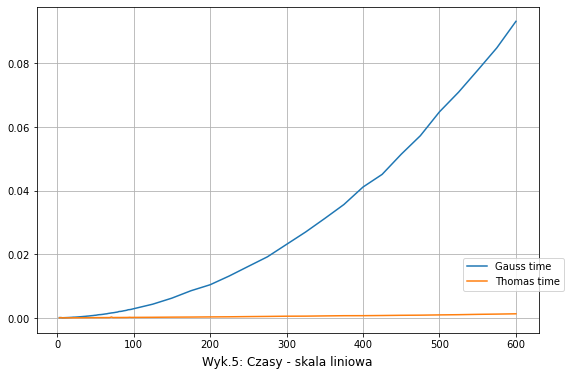

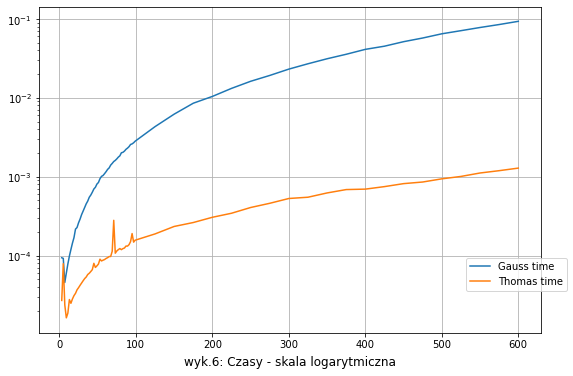

In [28]:
plot(df, title="Wyk.5: Czasy - skala liniowa")
print()
plot(df, title="wyk.6: Czasy - skala logarytmiczna", scale="log")